# Test with MNIST

In [31]:
import torch
import torch.nn as nn
import numpy as np
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_test.shape)
digit=0
data_dir='./data/{}.npy'.format(digit)
# find digits
idx=np.argwhere(y_test==digit).reshape(-1)
np.save(data_dir, x_test[idx])

(10000, 28, 28)


In [32]:
one_digit_imgs=np.load(data_dir)
print(one_digit_imgs.shape)
one_line_imgs=one_digit_imgs[:, 14] # extract the middle line from the image
print(one_line_imgs.shape)
extracted_data_dir='./data/extracted_{}.npy'.format(digit)
np.save(extracted_data_dir, one_line_imgs)

(980, 28, 28)
(980, 28)


(28, 28)


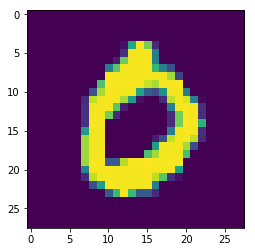

In [33]:
import matplotlib.pyplot as plt

one_img=one_digit_imgs[0]
print(one_img.shape)
plt.imshow(one_img)
plt.show()

(1, 28)


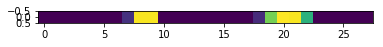

In [34]:
one_line=np.expand_dims(one_line_imgs[0], axis=0)
print(one_line.shape)
plt.imshow(one_line)
plt.show()

In [86]:
# simple test for heuristic
# filter for one line of extracted image
import numpy as np
import torch
import torch.nn as nn

x0=np.load('./data/extracted_0.npy')/255.
x1=np.load('./data/extracted_1.npy')/255.
print(x0.shape, x1.shape)
l0=np.zeros(x0.shape[0])
l1=np.ones(x1.shape[0])
x=np.concatenate((x0, x1), axis=0)
label=np.concatenate((l0, l1), axis=0)
print(x.shape, label.shape)
criterion = nn.NLLLoss()

class classifier(nn.Module):
    def __init__(self, input_dim):
        super(classifier, self).__init__()
        self.w = nn.Parameter(torch.randn(input_dim,1))
        self.b = nn.Parameter(torch.randn(1))
        self.sigmoid = nn.Sigmoid()
        
        self.optimizer = torch.optim.Adam(self.parameters(), lr=1e-1)

        
    def forward(self, x):
        prob = self.sigmoid(x@self.w+self.b)
        numerical_bound=1e-7
        prob = torch.clamp(prob, numerical_bound, 1-numerical_bound)
        output = torch.cat((torch.log(prob+1e-7), torch.log(1-prob)), -1)
        return output
    
model = classifier(input_dim=28)
x = torch.tensor(x).float()
label = torch.tensor(label).type(torch.int64)
for i in range(1000):
    output=model(x)
    model.optimizer.zero_grad()
    loss=criterion(output, label)
    loss.backward()
    model.optimizer.step()
    print(i, loss.item())
    
print(model.w, model.b)

(980, 28) (1135, 28)
(2115, 28) (2115,)
0 1.5181443691253662
1 1.2069931030273438
2 0.936150848865509
3 0.7111155390739441
4 0.5330819487571716
5 0.39813530445098877
6 0.2988879680633545
7 0.22704263031482697
8 0.1752098947763443
9 0.13761164247989655
10 0.11005278676748276
11 0.08959071338176727
12 0.07418552041053772
13 0.062421709299087524
14 0.05331174284219742
15 0.04616015404462814
16 0.04047253727912903
17 0.03589319437742233
18 0.03216357156634331
19 0.02909325622022152
20 0.026540277525782585
21 0.024397941306233406
22 0.02258460409939289
23 0.021037690341472626
24 0.019708270207047462
25 0.018558092415332794
26 0.017556551843881607
27 0.016679365187883377
28 0.015906961634755135
29 0.0152233075350523
30 0.0146153150126338
31 0.014072224497795105
32 0.013585107401013374
33 0.01314640510827303
34 0.012749895453453064
35 0.012390236370265484
36 0.01206289790570736
37 0.011764074675738811
38 0.011490389704704285
39 0.01123904436826706
40 0.011007541790604591
41 0.0107937213033437

553 0.002275885548442602
554 0.0022726566530764103
555 0.002269434742629528
556 0.002266219351440668
557 0.0022630118764936924
558 0.0022598092909902334
559 0.0022566174156963825
560 0.0022534294985234737
561 0.0022502541542053223
562 0.0022470764815807343
563 0.0022439146414399147
564 0.002240754198282957
565 0.002237599343061447
566 0.0022344577591866255
567 0.002231316640973091
568 0.0022281836718320847
569 0.002225059550255537
570 0.002221941715106368
571 0.0022188317961990833
572 0.0022157239727675915
573 0.002212623367086053
574 0.0022095327731221914
575 0.002206442877650261
576 0.002203364158049226
577 0.0022002914920449257
578 0.002197226509451866
579 0.0021941629238426685
580 0.0021911109797656536
581 0.0021880611311644316
582 0.0021850187331438065
583 0.002181983320042491
584 0.0021789546590298414
585 0.0021759329829365015
586 0.0021729154977947474
587 0.0021699038334190845
588 0.002166902180761099
589 0.002163900760933757
590 0.0021609102841466665
591 0.0021579251624643803
5

(1, 28)


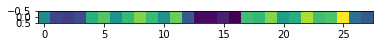

In [87]:
# plot the filter
w=model.w.detach().view(1, -1).numpy()
print(w.shape)
plt.imshow(w)
plt.show()

In [ ]:
# test with one sample
test_sample = torch.tensor([x_test[10]]).float()
prob = model.sigmoid(test_sample@model.w+model.b)
print(prob)

In [97]:
# simple test for heuristic
# filter for whole image
import numpy as np
import torch
import torch.nn as nn

x0=np.load('./data/0.npy')/255. # normalization
x1=np.load('./data/1.npy')/255.
print(x0.shape, x1.shape)
l0=np.zeros(x0.shape[0])
l1=np.ones(x1.shape[0])
x=np.concatenate((x0, x1), axis=0)
label=np.concatenate((l0, l1), axis=0)
print(x.shape, label.shape)
criterion = nn.NLLLoss()

class classifier(nn.Module):
    def __init__(self, input_dim):
        super(classifier, self).__init__()
        self.w = nn.Parameter(torch.randn(input_dim, input_dim))
        self.b = nn.Parameter(torch.randn(1))
        self.sigmoid = nn.Sigmoid()
        
        self.optimizer = torch.optim.Adam(self.parameters(), lr=1e-1)

        
    def forward(self, x):
#         prob = self.sigmoid(x@self.w+self.b)
        prob=self.sigmoid(torch.einsum('bij,ij->b',x, self.w)+self.b)
        numerical_bound=1e-7
        prob = prob.unsqueeze(-1)
        prob = torch.clamp(prob, numerical_bound, 1-numerical_bound)
        output = torch.cat((torch.log(prob+1e-7), torch.log(1-prob)), -1)
        return output
    
model = classifier(input_dim=28)
x = torch.tensor(x).float()
label = torch.tensor(label).type(torch.int64)
for i in range(1000):
    output=model(x)
    model.optimizer.zero_grad()
    loss=criterion(output, label)
    loss.backward()
    model.optimizer.step()
    print(i, loss.item())
    
print(model.w, model.b)

(980, 28, 28) (1135, 28, 28)
(2115, 28, 28) (2115,)
0 2.5406317710876465
1 0.4686528444290161
2 0.19418500363826752
3 0.15526965260505676
4 0.1010214164853096
5 0.061039868742227554
6 0.03908680006861687
7 0.028187571093440056
8 0.021252218633890152
9 0.0170951709151268
10 0.01475482527166605
11 0.013495518825948238
12 0.012886890210211277
13 0.012566464021801949
14 0.012354726903140545
15 0.012178455479443073
16 0.012009936384856701
17 0.011838286183774471
18 0.011658226139843464
19 0.011466966941952705
20 0.011262275278568268
21 0.011043061502277851
22 0.010808821767568588
23 0.010559608228504658
24 0.01029589306563139
25 0.010018558241426945
26 0.009728945791721344
27 0.009429181925952435
28 0.009122781455516815
29 0.008815978653728962
30 0.008519580587744713
31 0.008250320330262184
32 0.008028156124055386
33 0.007866335101425648
34 0.00776221277192235
35 0.007700882852077484
36 0.007666111923754215
37 0.0076463306322693825
38 0.0076347109861671925
39 0.007627551443874836
40 0.00762

359 9.571692316967528e-06
360 9.541240615362767e-06
361 9.511045391263906e-06
362 9.480933840677608e-06
363 9.451136975258123e-06
364 9.421537470188923e-06
365 9.392193533130921e-06
366 9.36287506192457e-06
367 9.33375849854201e-06
368 9.304923878517002e-06
369 9.276288437831681e-06
370 9.247851266991347e-06
371 9.219385901815258e-06
372 9.191232493321877e-06
373 9.163502909359522e-06
374 9.135522304859478e-06
375 9.107962796406355e-06
376 9.0804896899499e-06
377 9.053300345840398e-06
378 9.026223779073916e-06
379 8.999345482152421e-06
380 8.972497198556084e-06
381 8.945959052653052e-06
382 8.919535503082443e-06
383 8.893141057342291e-06
384 8.867084943631198e-06
385 8.84114433574723e-06
386 8.815343790047336e-06
387 8.789770618022885e-06
388 8.764311132836156e-06
389 8.738990800338797e-06
390 8.713731403986458e-06
391 8.688836715009529e-06
392 8.663942935527302e-06
393 8.639191946713254e-06
394 8.61463831824949e-06
395 8.590087418269832e-06
396 8.565846655983478e-06
397 8.541775059711

739 4.36840355177992e-06
740 4.361967967270175e-06
741 4.3556738091865554e-06
742 4.349266873759916e-06
743 4.342832198744873e-06
744 4.336509391578147e-06
745 4.330215233494528e-06
746 4.324034307501279e-06
747 4.317711955081904e-06
748 4.3115587686770596e-06
749 4.30520822192193e-06
750 4.299168267607456e-06
751 4.2929304981953464e-06
752 4.286721377866343e-06
753 4.280539997125743e-06
754 4.274527782399673e-06
755 4.268234533810755e-06
756 4.262194579496281e-06
757 4.256126430846052e-06
758 4.249945959600154e-06
759 4.2438773562025744e-06
760 4.23789379055961e-06
761 4.231825641909381e-06
762 4.225842076266417e-06
763 4.219830316287698e-06
764 4.213790816720575e-06
765 4.207892288832227e-06
766 4.201852789265104e-06
767 4.196010195300914e-06
768 4.189999344816897e-06
769 4.184184490441112e-06
770 4.178201379545499e-06
771 4.172275112068746e-06
772 4.166517101111822e-06
773 4.160589924140368e-06
774 4.154635917075211e-06
775 4.148934749537148e-06
776 4.143036221648799e-06
777 4.13733

(28, 28)


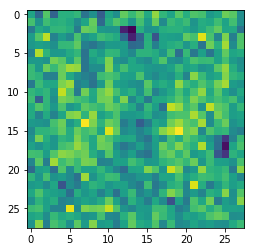

In [99]:
# plot the filter
w=model.w.detach().numpy()
print(w.shape)
plt.imshow(w)
plt.show()

In [102]:
# test with one sample
test_sample = torch.tensor([x1[10]]).float()
prob=model.sigmoid(torch.einsum('bij,ij->b',test_sample, model.w)+model.b)
print(prob)

tensor([1.2184e-13], grad_fn=<SigmoidBackward>)


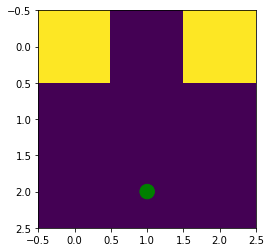

In [34]:
# determine the coordinate relationship between imshow() and scatter()
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
a=np.array([[1,0,1],[0,0,0],[0,0,0]])
fig, ax = plt.subplots()
ax.imshow(a)
ax.add_patch(Circle((1, 2), radius=0.1, color='green'))
ax.scatter(1,2, c='r')

plt.show(fig)